In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/home/hammadali08/Vidoes/CSV file/Diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


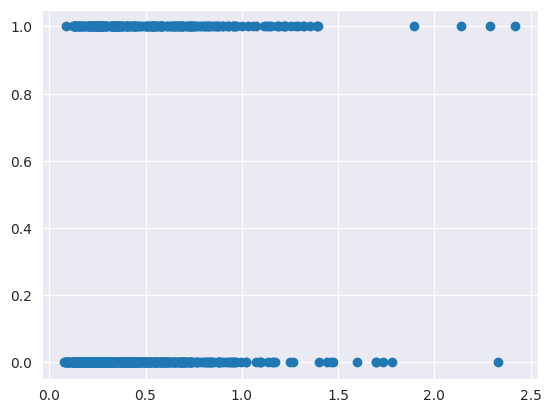

In [3]:
plt.scatter(data['DiabetesPedigreeFunction'],data['Outcome'])
plt.show()

In [4]:
x=data[['DiabetesPedigreeFunction']]
y=data['Outcome']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=28)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lg=LogisticRegression()

In [9]:
lg.fit(x_train,y_train)

LogisticRegression()

In [10]:
lg.score(x_train,y_train)

0.6579804560260586

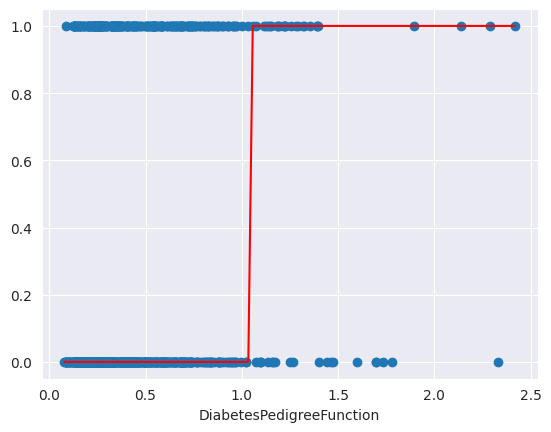

In [11]:
plt.scatter(data['DiabetesPedigreeFunction'],data['Outcome'])
sns.lineplot(x=data['DiabetesPedigreeFunction'],y=lg.predict(x),color='red')
plt.show()

In [12]:
lg.predict([[0.232]])

/home/hammadali08/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [13]:
X= data.iloc[:,:-1]
Y=data['Outcome']

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
lg.fit(X_train,Y_train)

/home/hammadali08/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
lg.score(X_train,Y_train)

0.7703583061889251

In [17]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [18]:
lg.coef_

array([[ 0.06106262,  0.0337888 , -0.01387792,  0.00474554, -0.0019446 ,
         0.10151985,  0.59002294,  0.03768787]])

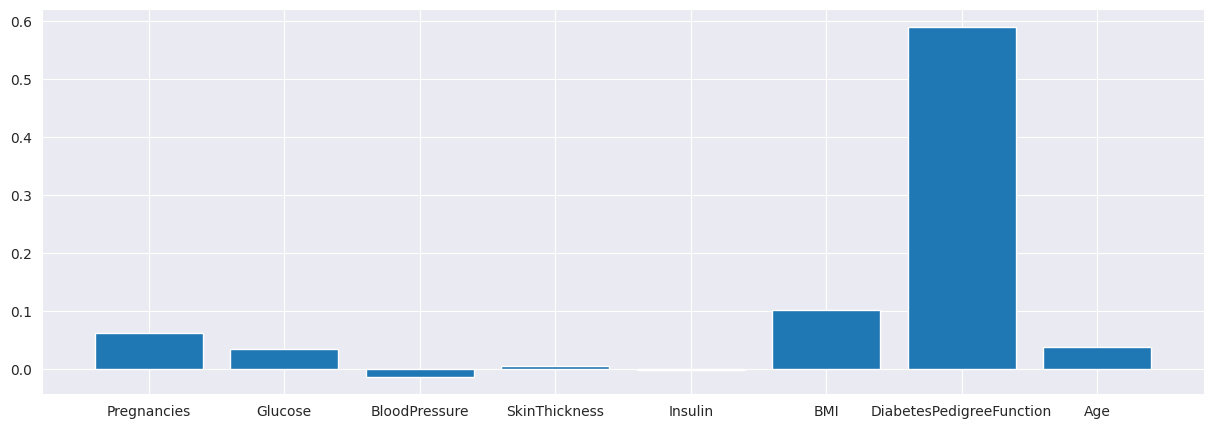

In [19]:
plt.figure(figsize=(15,5))
plt.bar(X.columns, lg.coef_[0])
plt.show()

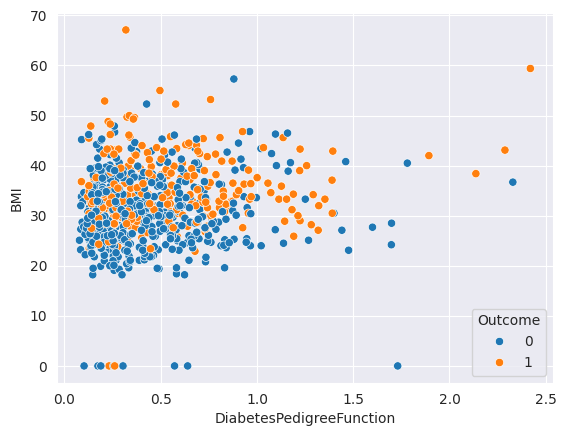

In [20]:
sns.scatterplot(x=data['DiabetesPedigreeFunction'],y=data['BMI'],color='red', hue=data['Outcome'])
plt.show()

In [21]:
x1=data[['BMI','DiabetesPedigreeFunction']]
y1=data['Outcome']

In [22]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=47)

In [23]:
lg.fit(x1_train,y1_train)

LogisticRegression()

In [24]:
lg.score(x1_test,y1_test)

0.7662337662337663

In [25]:
from mlxtend.plotting import plot_decision_regions

/home/hammadali08/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

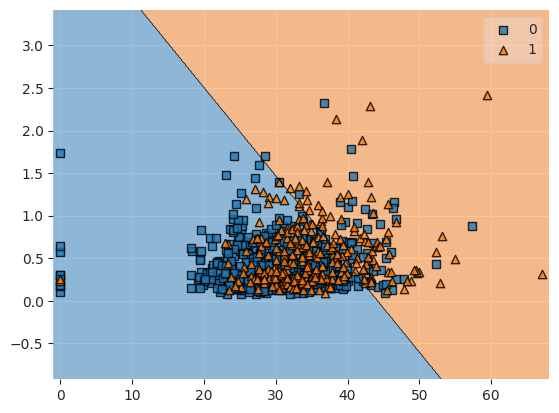

In [26]:
plot_decision_regions(x1.to_numpy(),y1.to_numpy(),clf=lg)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y1_test,lg.predict(x1_test))

0.7662337662337663

In [29]:
from sklearn.linear_model import LogisticRegressionCV

In [30]:
lgc=LogisticRegressionCV(cv=5)

In [31]:
lgc.fit(x1_train,y1_train)

LogisticRegressionCV(cv=5)

In [32]:
lgc.score(x1_test,y1_test)

0.7662337662337663

/home/hammadali08/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


<Axes: >

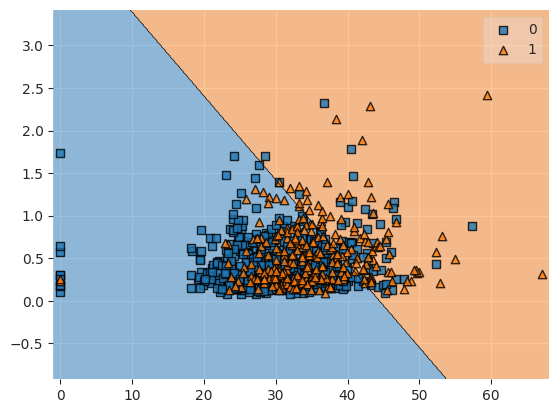

In [33]:
plot_decision_regions(x1.to_numpy(),y1.to_numpy(),clf=lgc)